# < 한국과 아시아 국가들과의 환율 연관성 분석 >
### - 황주원

In [2]:
%matplotlib inline

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from datetime import datetime

plt.rcParams["font.family"] = 'Malgun Gothic'


## 1. 데이터 수집
    * fred를 통해서 아시아 9개 국가의 환율 정보 

### 가. 최근 3년간 9개국 환율 자료

In [3]:
inx_code = ["DEXKOUS", "DEXCHUS", "DEXJPUS","DEXHKUS", "DEXINUS", "DEXMAUS", "DEXTAUS", "DEXSIUS", "DEXTHUS"]
inx_regend = ["한국", "중국", "일본", "홍콩", "인도네시아", "말레이시아", "대만", "싱가폴", "태국"]

start = datetime(2015, 1, 1)
end = datetime(2017, 12, 31)

df = pdr.DataReader(inx_code, 'fred', start, end)
df.columns = inx_regend
df.head()

,한국,중국,일본,홍콩,인도네시아,말레이시아,대만,싱가폴,태국
DATE,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,1103.73,6.2046,120.20,7.7563,63.27,3.5150,31.74,1.3303,32.94
2015-01-05,1109.07,6.2201,119.64,7.7557,63.34,3.5320,32.00,1.3354,32.95
2015-01-06,1098.14,6.2125,118.26,7.7532,63.57,3.5555,31.98,1.3319,32.86
2015-01-07,1101.51,6.2127,119.52,7.7548,63.27,3.5800,31.99,1.3412,32.87


In [4]:
# 결측값을 제거

df1 = df.dropna()
df1.head()

,한국,중국,일본,홍콩,인도네시아,말레이시아,대만,싱가폴,태국
DATE,,,,,,,,,
2015-01-02,1103.73,6.2046,120.20,7.7563,63.27,3.5150,31.74,1.3303,32.94
2015-01-05,1109.07,6.2201,119.64,7.7557,63.34,3.5320,32.00,1.3354,32.95
2015-01-06,1098.14,6.2125,118.26,7.7532,63.57,3.5555,31.98,1.3319,32.86
2015-01-07,1101.51,6.2127,119.52,7.7548,63.27,3.5800,31.99,1.3412,32.87
2015-01-08,1096.19,6.2143,119.51,7.7553,62.67,3.5650,31.99,1.3360,32.86


### 나. 환율 연관분석
    * 한국을 기준으로 태국과의 연관성이 가장큼

In [38]:
corr = df1.corr()
corr

,한국,중국,일본,홍콩,인도네시아,말레이시아,대만,싱가폴,태국
한국,1.000000,0.223222,0.097917,-0.127690,0.699977,0.517436,0.701502,0.707069,0.805594
중국,0.223222,1.000000,-0.608604,0.374929,0.532800,0.795958,-0.244029,0.432283,0.285823
일본,0.097917,-0.608604,1.000000,-0.245683,-0.408682,-0.254630,0.158241,0.232280,-0.050195
홍콩,-0.127690,0.374929,-0.245683,1.000000,-0.150741,0.313057,-0.560375,-0.146134,-0.411941
인도네시아,0.699977,0.532800,-0.408682,-0.150741,1.000000,0.605271,0.550675,0.515704,0.812437
말레이시아,0.517436,0.795958,-0.254630,0.313057,0.605271,1.000000,0.025604,0.725223,0.560838
대만,0.701502,-0.244029,0.158241,-0.560375,0.550675,0.025604,1.000000,0.416757,0.726074
싱가폴,0.707069,0.432283,0.232280,-0.146134,0.515704,0.725223,0.416757,1.000000,0.690481
태국,0.805594,0.285823,-0.050195,-0.411941,0.812437,0.560838,0.726074,0.690481,1.000000


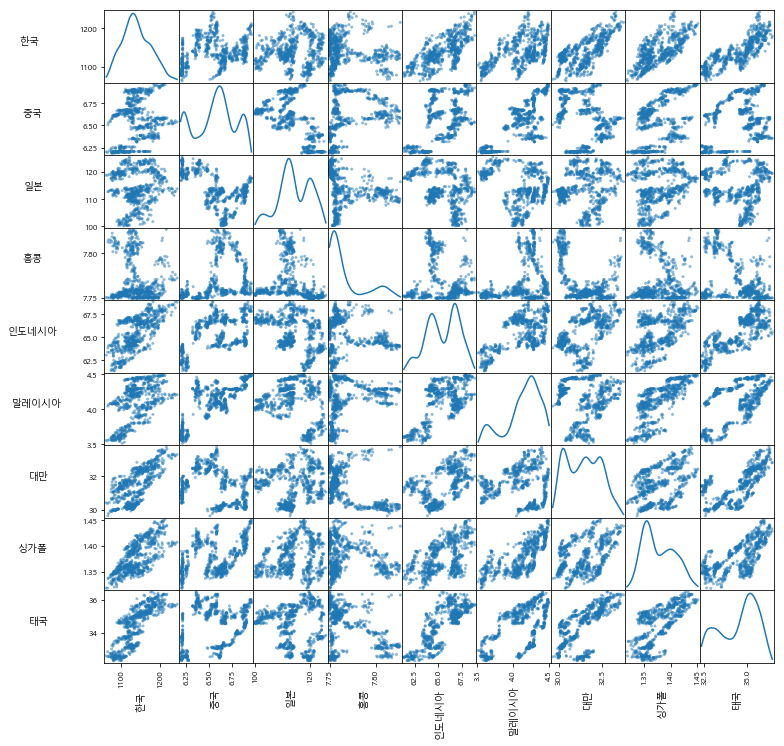

In [9]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(df1, diagonal='kde', figsize=(12, 12))
n = len(df1.columns)

for x in range(n):
    for y in range(n):
        ax = axs[x, y]
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
        
plt.show()

## 2. 훈련
    * 데이터를 학습 데이터와 테스트 데이터로 분리

In [19]:
X = df1[["중국", "일본", "홍콩", "인도네시아", "말레이시아", "대만", "싱가폴", "태국"]]

y = df1["한국"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = .7, random_state=20170101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\aidsw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((525, 8), (226, 8), (525,), (226,))

### 가. 선형 회귀 모델

In [20]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 1) 학습 오차

In [24]:
model.score(X_train, y_train)
pred = model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, pred))

13.84157121414174

####  2)  테스트 오차

In [22]:
model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


15.10967454045655

### 나. k-최근접 이웃 회귀

In [28]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


10.458657649192297

### 다. 지지 벡터 머신 (SVM) 회귀

In [30]:
from sklearn import svm

model = svm.SVR()
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


21.604481623175015

### 라. 결정 트리 회귀

In [31]:
from sklearn import tree

model = tree.DecisionTreeRegressor(random_state=20170101)
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


12.042240791245463

### 마. 랜덤 포레스트 회귀

In [42]:
from sklearn import ensemble

model = ensemble.RandomForestRegressor(random_state=20170101)
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


8.037570248526606

### 바. 아다 부스팅 회귀

In [33]:
from sklearn import ensemble
model = ensemble.AdaBoostRegressor(random_state=20170101)
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


10.641665326807614

### 사. 다층 퍼셉트론 회귀 (인공신경망)

In [34]:
from sklearn import neural_network

model = neural_network.MLPRegressor(random_state=20170101)
model.fit(X_train, y_train)

model.score(X_test, y_test)
pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))


C:\Users\aidsw\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


32.39197702087634

## 3. 학습결과
    * 선영회귀 모델의 학습오차 : 13.8 / 테스트오차 : 15.2
    * k-최근접 이웃 회귀 : 10.5 
    * 지지 벡터 머신 (SVM) 회귀 : 21.6 
    * 결정 트리 회귀 : 12.0
    * 아다 부스팅 회귀 : 10.6
    * 다층 퍼셉트론 회귀 (인공신경망) : 32.4
    
    -> 학습결과  k-최근접 이웃 회귀 모델의 편차가 가장 적으로 나옴
    -> k-최근접 이웃 회귀 모델의 경우 복잡하거나 이해하기 어려운 속성과 목적 범주에 관련된 분류 작업에 적합한 모델
    
    